In [49]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [50]:
df = pd.read_csv(r"C:\Users\cks12\Downloads\PML Project\dataset\raw\CleanDataset.csv")
df.columns

Index(['Unnamed: 0', 'EmployeeID', 'Attrition', 'Age', 'HomeToWork',
       'HourlnWeek', 'Involvement', 'WorkLifeBalance', 'JobSatisfaction',
       'ESOPs', 'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MonthlyIncome',
       'TravelProfile_Rarely', 'TravelProfile_Yes', 'Department_Analytics',
       'Department_Marketing', 'Department_Sales', 'EducationField_CA',
       'EducationField_Engineer', 'EducationField_MBA',
       'EducationField_Marketing Diploma', 'EducationField_Statistics',
       'Gender_F', 'Gender_M', 'Designation_AVP', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [51]:
df.corr()
X=df.drop(columns=['Unnamed: 0','EmployeeID','MonthlyIncome'],axis=1)
X

,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,...,EducationField_Statistics,Gender_F,Gender_M,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,0.0,35.0,5.0,69.0,1,1,1,1,1,1,...,0,0,1,0,1,0,0,0,1,0
1,1.0,32.0,5.0,62.0,4,3,2,0,8,0,...,1,1,0,0,1,0,0,0,0,1
2,0.0,31.0,5.0,45.0,5,3,2,1,3,0,...,1,1,0,0,0,1,0,0,0,1
3,0.0,34.0,10.0,32.0,3,2,4,1,1,0,...,1,1,0,0,0,1,0,0,0,0
4,0.0,37.0,27.0,49.0,3,4,4,1,8,0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,0.0,36.0,13.0,53.0,3,3,3,0,4,1,...,0,1,0,0,0,1,0,0,0,1
5176,0.0,36.0,9.0,66.0,1,4,4,1,9,0,...,0,1,0,0,1,0,0,0,0,1
5177,0.0,29.0,9.0,62.0,4,2,1,1,6,0,...,0,1,0,0,1,0,0,0,1,0
5178,0.0,26.0,26.0,61.0,3,4,3,0,1,0,...,1,1,0,0,1,0,0,0,0,0


In [52]:
y=df['MonthlyIncome']

In [53]:
y.describe()

count     5180.000000
mean     21693.095841
std       4727.614089
min       1000.000000
25%      18377.000000
50%      20231.000000
75%      23346.000000
max      95000.000000
Name: MonthlyIncome, dtype: float64

In [57]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=43)

In [58]:
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [59]:
Xtest_scaled.shape

(1036, 33)

In [60]:
ytest.shape

(1036,)

In [61]:
Xtest_scaled.shape

(1036, 33)

In [62]:
Xtrain_scaled_m = np.hstack((np.ones_like(Xtrain_scaled[:,:1]), Xtrain_scaled))
Xtest_scaled_m = np.hstack((np.ones_like(Xtest_scaled[:,:1]), Xtest_scaled))
Xtrain_scaled_m.shape

(4144, 34)

In [63]:
w = np.linalg.solve(np.dot(Xtrain_scaled_m.T, Xtrain_scaled_m), np.dot(Xtrain_scaled_m.T, np.log(ytrain)))
print(w)

[ 9.96432551e+00 -6.87663846e-03 -1.62104706e-03  2.02577870e-03
  4.25809021e-03  3.18724110e-03  1.13945880e-03  9.98934182e-04
 -7.84754105e-04  8.78750048e-03  4.28043683e-03  1.23075047e-03
  4.50430893e-03  4.43951071e-03  5.25544902e-03  3.86821795e-03
  1.07598167e-03  2.80489811e-02  1.19177804e-02  2.71194927e-02
  4.48168053e-03  2.33415422e-03  1.54941767e-03  5.26418810e-03
  4.27094200e-03  3.87988562e-03  5.50149428e-03  1.15569701e-01
 -2.15650256e-03  5.60386424e-02  1.07143613e-01  1.23473751e-01
  6.79577905e-04 -6.47363295e-04]


In [64]:
w.shape

(34,)

In [65]:
def predict(x, w):
    X_p = np.hstack((np.ones_like(x[:,:1]), x))
    return np.exp(np.dot(X_p ,w))

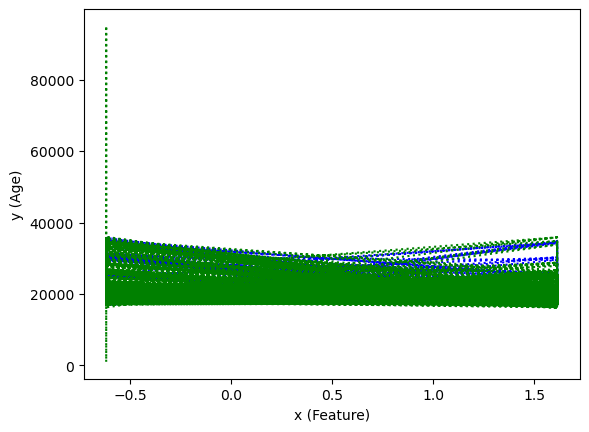

In [66]:
def plot_fit(x_test, y_test, x, y):
    plt.plot(x_test[:,:1], y_test, 'b:')
    plt.plot(x[:,:1], y, 'g:')
    plt.ylabel("y (Age)")
    plt.xlabel("x (Feature)")
    plt.show()


plot_fit(Xtest_scaled, predict(Xtest_scaled, w), Xtest_scaled, ytest)

In [67]:
def compute_RSS(x, y, w):
    return np.sqrt(np.mean((y - predict(x, w)) ** 2))
    

print(compute_RSS(Xtest_scaled, ytest,w))

2833.0930988688565
